Necessary libraries:

#pip install scikit-learn
#pip install mediapipe



In [7]:
import os
import cv2
import time
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Activation, Dropout

img_size = 100

datadir = "Dataset"

#datadir = r'C:\Users\pc\source\repos\CvprAssignment\Final\Dataset'
CATEGORIES = os.listdir(datadir)
print(CATEGORIES)


['mask_weared_incorrect', 'without_mask', 'with_mask']


In [5]:

# Defining three empty lists to contain image data
x, y = [], []

def PreProcess():
    for category in CATEGORIES:
        path = os.path.join(datadir, category)
        classIndex = CATEGORIES.index(category)
        print(path)
        for imgs in tqdm(os.listdir(path)):
            img_arr = cv2.imread(os.path.join(path, imgs))
            
            # Resizing the image
            resized_array = cv2.resize(img_arr, (img_size, img_size))
            cv2.imshow("images", resized_array)
            cv2.waitKey(1)
            resized_array = resized_array/255.0
            x.append(resized_array)
            y.append(classIndex)

PreProcess()
cv2.destroyAllWindows()

C:\Users\pc\source\repos\CVPR\Dataset\mask_weared_incorrect


100%|██████████| 2994/2994 [00:46<00:00, 64.53it/s]


C:\Users\pc\source\repos\CVPR\Dataset\without_mask


100%|██████████| 2994/2994 [00:46<00:00, 64.02it/s]


C:\Users\pc\source\repos\CVPR\Dataset\with_mask


100%|██████████| 2994/2994 [00:46<00:00, 64.01it/s]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [7]:

# Converting and resizing the data to a numpy array
X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

batch_size = 32
epochs = 15

In [8]:
# Creating the model architecture
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(len(CATEGORIES)))  # Output layer with the number of categories
model.add(Activation('softmax'))

# Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 256)       147712    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 256)       0         
 g2D)                                                   

In [9]:
t1 = time.time()

# Fit the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, verbose=1)
model.save('{}.h5'.format("model"))

t2 = time.time()
print('Time taken: ', t2 - t1)

Epoch 1/15
158/158 [==============================] - 275s 2s/step - loss: 0.6906 - accuracy: 0.6516 - val_loss: 0.5167 - val_accuracy: 0.8006
Epoch 2/15
158/158 [==============================] - 195s 1s/step - loss: 0.3472 - accuracy: 0.8799 - val_loss: 0.4439 - val_accuracy: 0.8451
Epoch 3/15
158/158 [==============================] - 200s 1s/step - loss: 0.2809 - accuracy: 0.9052 - val_loss: 0.2398 - val_accuracy: 0.9193
Epoch 4/15
158/158 [==============================] - 229s 1s/step - loss: 0.2013 - accuracy: 0.9294 - val_loss: 0.1780 - val_accuracy: 0.9355
Epoch 5/15
158/158 [==============================] - 224s 1s/step - loss: 0.1775 - accuracy: 0.9372 - val_loss: 0.1456 - val_accuracy: 0.9429
Epoch 6/15
158/158 [==============================] - 216s 1s/step - loss: 0.1408 - accuracy: 0.9473 - val_loss: 0.1276 - val_accuracy: 0.9536
Epoch 7/15
158/158 [==============================] - 204s 1s/step - loss: 0.1190 - accuracy: 0.9565 - val_loss: 0.1067 - val_accuracy: 0.9638

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Time taken:  3441.18994641304


In [10]:
validation_loss, validation_accuracy = model.evaluate(X_test, y_test)


57/57 [==============================] - 18s 320ms/step - loss: 0.0789 - accuracy: 0.9789


In [2]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model('model.h5')

# Define mediapipe Face detector
face_detection = mp.solutions.face_detection.FaceDetection()

# Detection function
def get_detection(frame):
    height, width, channel = frame.shape
    # Convert frame BGR to RGB colorspace
    imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Detect results from the frame
    result = face_detection.process(imgRGB)
    try:
        for count, detection in enumerate(result.detections):
            # Extract bounding box information 
            box = detection.location_data.relative_bounding_box
            x, y, w, h = int(box.xmin*width), int(box.ymin * height), int(box.width*width), int(box.height*height)
    except:
        pass
    return x, y, w, h

# Define the categories
CATEGORIES = ['mask_weared_incorrect', 'without_mask', 'with_mask']

# Capture video from the default camera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
      
        cap.release()
        cap = cv2.VideoCapture(0)
        continue 
    
    img = frame.copy()
    try:
        x, y, w, h = get_detection(frame)
    except Exception as e:
        print("Error during face detection:", str(e))
        x, y, w, h = 0, 0, 0, 0  
    
    try:
        # Crop the image and do the prediction only when face detection succeeds
        if w > 0 and h > 0:
            crop_img = img[y:y+h, x:x+w]
            crop_img = cv2.resize(crop_img, (100, 100))
            crop_img = np.expand_dims(crop_img, axis=0)
            
            # Get the prediction from the model
            prediction = model.predict(crop_img)
            print(prediction)
            index = np.argmax(prediction)
            res = CATEGORIES[index]
            # Set color based on the prediction
            if index == 0:
                color = (0, 0, 255)  # Red for 'mask_weared_incorrect'
            elif index == 1:
                color = (0, 255, 0)  # Green for 'without_mask'
            else:
                color = (255, 0, 0)  # Blue for 'with_mask'
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, res, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, cv2.LINE_AA)
    except Exception as e:
        print("Error during image processing:", str(e))
        pass
    
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == ord('q'):
        break

# Release the camera and destroy any OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 166ms/step
[[4.943839e-05 0.000000e+00 9.999505e-01]]
1/1 [==============================] - 0s 47ms/step
[[2.354334e-31 0.000000e+00 1.000000e+00]]
1/1 [==============================] - 0s 40ms/step
[[0.8131781  0.         0.18682185]]
1/1 [==============================] - 0s 42ms/step
[[1.0000000e+00 0.0000000e+00 1.9463975e-17]]
1/1 [==============================] - 0s 54ms/step
[[2.3010619e-04 0.0000000e+00 9.9976987e-01]]
1/1 [==============================] - 0s 44ms/step
[[9.999918e-01 0.000000e+00 8.270901e-06]]
1/1 [==============================] - 0s 40ms/step
[[0.9913795  0.         0.00862054]]
1/1 [==============================] - 0s 39ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 36ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 46ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 40ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 33ms/step
[[1. 0. 0.]]
1/1 [==========


OUTPUTS

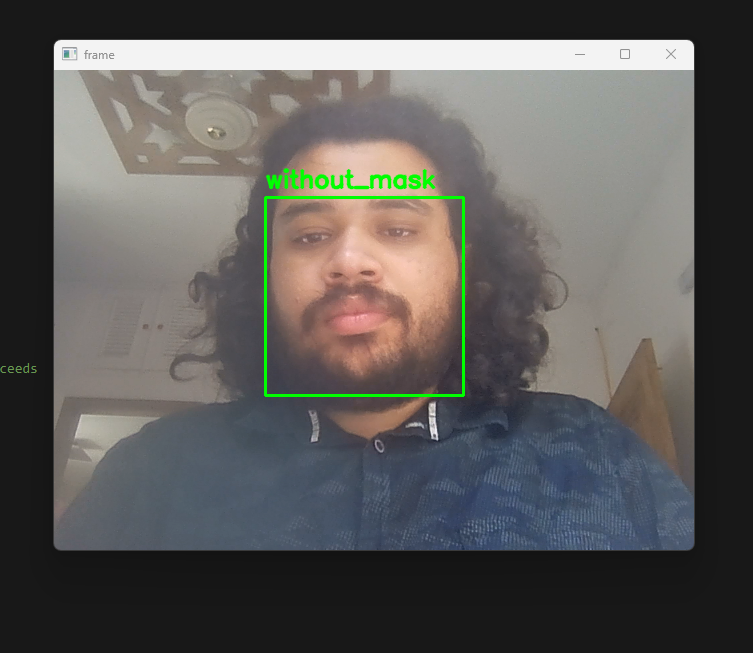 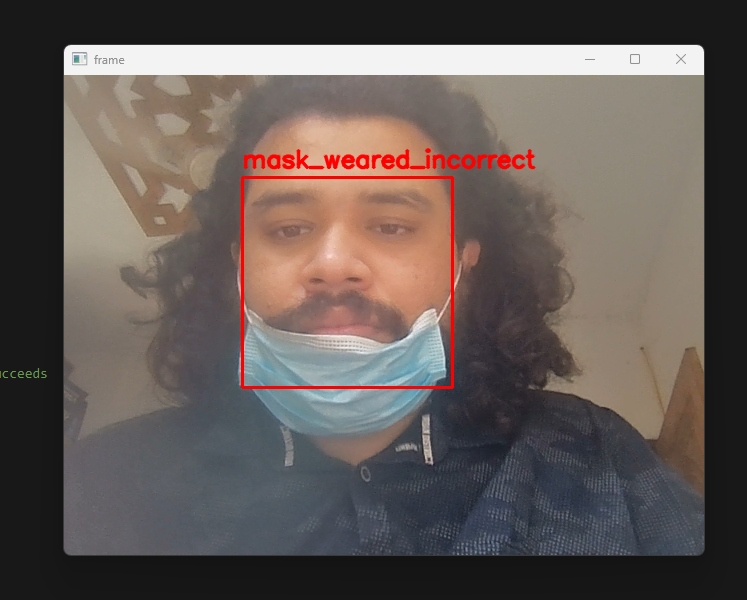 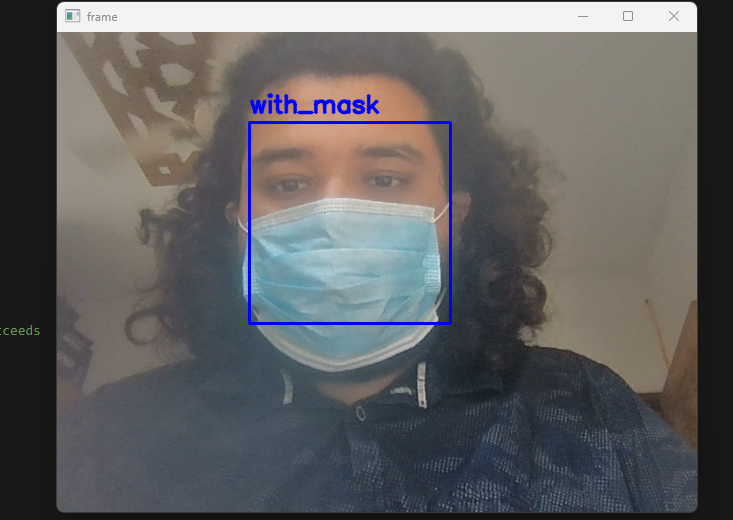